In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty

# **Features:**


*   Get overall stat of message count wrt contacts: **getOverallMessageStat()**
*   Get a bar plot of 'contacts vs #messages: **getMsgCountGraph()**
*   Get your message vocabulary stats: **getMyVocabularyStat()**
*   Get a bar plot of your message vocabulary: **getWordCountGraph()** 
*   Get wordcloud made out of your most used words: **show_wordcloud()**




In [0]:
from bs4 import BeautifulSoup
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [84]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [127]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 2.7MB/s 
  Running setup.py bdist_wheel for wordcloud ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/23/f9/5b/3fd378852bbeb8833fccc377757de44d7ea393863a368e4ffa
Successfully built wordcloud


In [0]:
from wordcloud import WordCloud, STOPWORDS

**Get total number of html files to parse:**

In [0]:
def getFileCount(dirname):
  path, dirs, files = os.walk(dirname).next()
  file_count = len(files)
  return file_count

**Name of Contact and number of messages exchanged:**

In [0]:
def getOverallMessageStat(dirname,time_step=50):
  num_files = getFileCount(dirname)
  msg_dct = {}
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    ls = soup.find_all('p')
    num_msgs = len(ls)
    num_contact = soup.find('title').text[18:]
    msg_dct[num_contact] = num_msgs
    if i%time_step == 0:
      print "Progress:" + str(i) + " contacts processed"
  dct = sorted(msg_dct.items(), key=lambda x: x[1],reverse=True)
  return dct

  

In [4]:
msgstatList = getOverallMessageStat('drive/COLAB/Facebook/Message/')

Progress:0 contacts processed
Progress:50 contacts processed
Progress:100 contacts processed
Progress:150 contacts processed
Progress:200 contacts processed
Progress:250 contacts processed
Progress:300 contacts processed
Progress:350 contacts processed


In [0]:
def msgcountGraphHelper(msgstat,defaultcount = 10):
  nameList = []
  msgnumList = []
  count = 0
  for k in msgstat:
    if count <defaultcount:
      nameList.append(k[0])
      msgnumList.append(k[1])
    else:
      break
    count = count + 1
  return nameList, msgnumList

In [0]:
x, y = msgcountGraphHelper(msgstatList,15)

**Show bar plot of Contacts vs #Messages:**

In [0]:
def getMsgCountGraph(msgstatList,msgscount=10):
  x,y = msgcountGraphHelper(msgstatList,msgscount)
  n = len(x)
  sns.set_context(rc={"figure.figsize": (18, 5)})
  nd = np.arange(n)
  width=0.2
  #plt.xticks(nd+width/2., ('1','1000','1001'))
  plt.xticks(nd+width/2., x,rotation = 90)
  plt.xlim(-0.15,n)
  plt.xlabel("Contact Name")
  plt.ylabel("# of Messages")
  fig = plt.bar(nd, y, color=sns.color_palette("Greens",n))
  #plt.legend(fig, ['First','Second','Third'], loc = "upper left", title = "cat")
  plt.show()

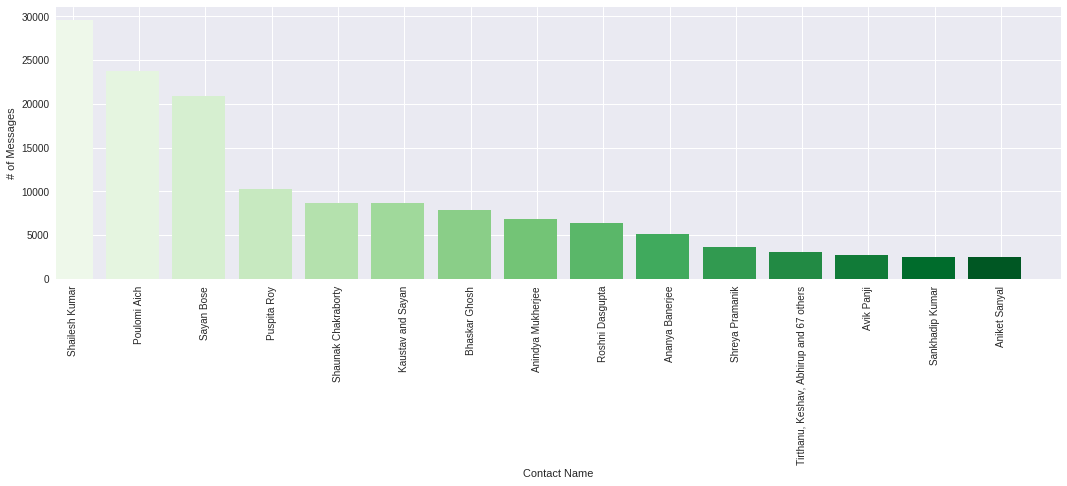

In [16]:
getMsgCountGraph(msgstatList, 15)

In [61]:
msgstatList[85]

(u'Chalavadi Vishnu', 151)

**Get Facebook message Vocabulary:**

In [0]:
def getMyVocabularyStat(dirname):
  num_files = getFileCount(dirname)
  messages = []
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    for items in soup.find_all('span', 'user'):
      if items.text == 'Shamik Kundu':
        a = items.find_next('p')
        messages.append(a)
  vc = {}
  for message in messages:
    msg = message.text
    tokens = nltk.word_tokenize(msg)
    for token in tokens:
      tk_lower = token.lower()
      if tk_lower not in vc:
        vc[tk_lower] = 1
      else:
        vc[tk_lower] += 1
  vct = sorted(vc.items(), key=lambda x: x[1],reverse=True)
  v_clean = []
  for item in vct:
    word = item[0]
    count = item[1]
    try:
      word = str(word)
    except:
      pass
    v_clean.append((word,count))
  return v_clean
  
  

In [0]:
v = getMyVocabularyStat("drive/COLAB/Facebook/Message/")

In [197]:
v[0:50]

[('!', 40495),
 ('?', 28564),
 (':', 15292),
 ('to', 12911),
 ('i', 11704),
 ('.', 9529),
 ('e', 8625),
 ('the', 7839),
 ('p', 7556),
 (',', 7465),
 ('you', 7094),
 ('na', 6980),
 ('er', 6670),
 ('ta', 5119),
 ('a', 4861),
 ('ki', 4749),
 ('o', 4082),
 ('in', 3996),
 (')', 3956),
 ('it', 3869),
 ('and', 3781),
 ('of', 3558),
 ('is', 3542),
 ('ami', 3524),
 ('that', 3506),
 ('(', 3283),
 ('but', 3135),
 ("'s", 2940),
 ('r', 2844),
 ('tui', 2754),
 ('are', 2745),
 ('bhai', 2497),
 ('kore', 2465),
 ('...', 2444),
 ('do', 2414),
 ("n't", 2334),
 ('for', 2222),
 ('amar', 2219),
 ('thke', 2214),
 ('ei', 2206),
 ('me', 2195),
 ('te', 2189),
 ('haha', 2120),
 ('k', 2052),
 ("''", 2033),
 ('ache', 2016),
 ('have', 1995),
 ('this', 1967),
 ('ha', 1937),
 ('ekta', 1876)]

In [0]:
def WordCountGraphHelper(dirname,count):
  v_clean = getMyVocabularyStat(dirname)
  x = []
  y = []
  cnt = 0
  for item in v_clean:
    if cnt < count:
      x.append(item[0])
      y.append(item[1])
    else:
      break
    cnt = cnt + 1
  return x,y

In [0]:
def getWordCountGraph(dirname,wordscount=100):
  x,y = WordCountGraphHelper(dirname,wordscount)
  n = len(x)
  sns.set_context(rc={"figure.figsize": (18, 5)})
  nd = np.arange(n)
  width=0.2
  #plt.xticks(nd+width/2., ('1','1000','1001'))
  plt.xticks(nd+width/2., x,rotation = 90)
  plt.xlim(-0.15,n)
  plt.xlabel("Word Name")
  plt.ylabel("# of Occurances")
  fig = plt.bar(nd, y, color=sns.color_palette("Reds",n))
  #plt.legend(fig, ['First','Second','Third'], loc = "upper left", title = "cat")
  plt.show()

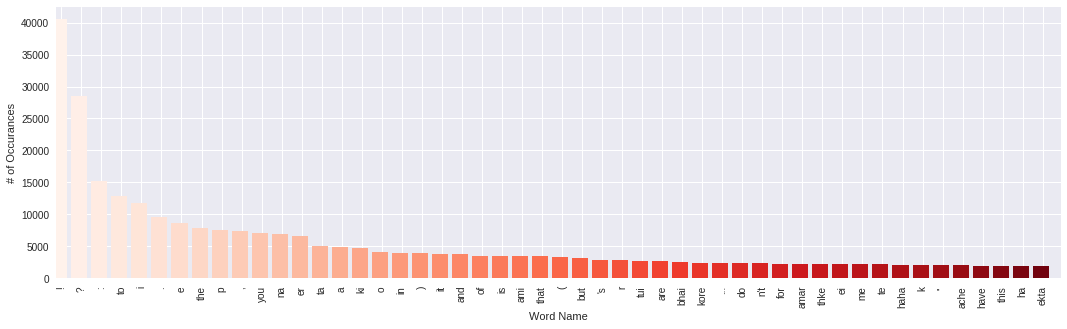

In [198]:
getWordCountGraph("drive/COLAB/Facebook/Message/",50)

**Get Wordcloud of top used words in messages:**

In [0]:
def wordCloudHelper(dirname):
  messages = []
  num_files = getFileCount(dirname)
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    for items in soup.find_all('span', 'user'):
      if items.text == 'Shamik Kundu':
        a = items.find_next('p')
        messages.append(a.text)
  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             "]+", flags=re.UNICODE)
  msgs = []
  for texts in messages:
    text = emoji_pattern.sub(r'', texts)
    try:
      text = str(text)
      msgs.append(text)
    except:
      msgs.append(text)
  return msgs

In [0]:
def show_wordcloud(dirname,count = 50, title = None):
    msgs = wordCloudHelper(dirname)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=count,
        max_font_size=40, 
        scale=5,
        random_state=0 
    ).generate(str(msgs))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

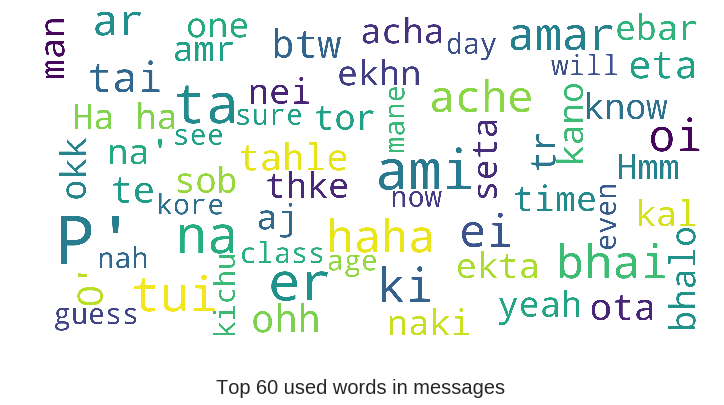

In [180]:
show_wordcloud('drive/COLAB/Facebook/Message/',60, 'Top 60 used words in messages')